In [1]:
!pip3 install wave

import pyaudio
import wave

CHUNK = 1024 
FORMAT = pyaudio.paInt16
CHANNELS = 2 
RATE = 44100
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output1.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,channels=CHANNELS,rate=RATE,input=True,frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.models import model_from_json
import librosa

opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)
json_file = open('./model.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("./Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")

loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Loaded model from disk


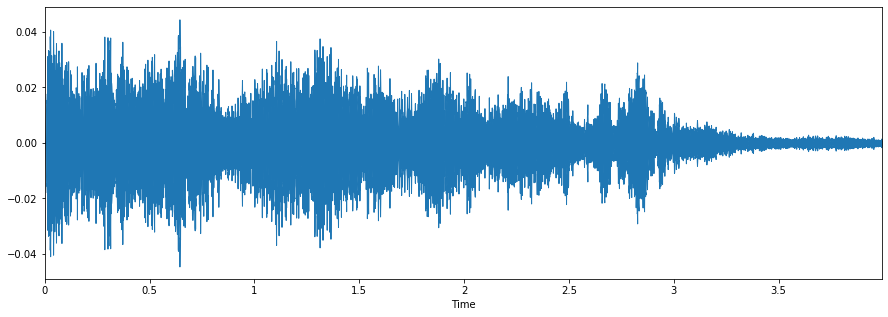

In [3]:
data, sampling_rate = librosa.load('output1.wav')
import librosa.display
from librosa.display import waveplot
import os
import pandas as pd
import glob 

plt.figure(figsize=(15,5))
librosa.display.waveplot(data, sr=sampling_rate)

X, sample_rate = librosa.load('output1.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [4]:
livedf2= pd.DataFrame(data=livedf2)

livedf2 = livedf2.stack().to_frame().T

livedf2

0          1          2          3          4          5    \
           0          0          0          0          0          0   
0 -23.390459 -27.194292 -34.266624 -33.119667 -32.389805 -32.541744   

         6          7          8          9    ...        206        207  \
           0          0          0          0  ...          0          0   
0 -34.213852 -33.015423 -30.997318 -30.782539  ... -39.241901 -37.429569   

         208        209        210        211        212        213  \
           0          0          0          0          0          0   
0 -36.182755 -31.966352 -30.974201 -31.225241 -32.973923 -35.968956   

         214       215  
           0         0  
0 -35.402615 -37.27977  

[1 rows x 216 columns]

In [5]:
twodim = np.expand_dims(livedf2, axis=2)

livepreds = loaded_model.predict(twodim,batch_size=32,verbose=1)

1/1 [==============================] - 11s 11s/step


In [6]:
livepreds

array([[2.5613498e-04, 2.4771357e-03, 8.5486867e-02, 3.5524555e-04,
        9.1118443e-01, 5.2340842e-14, 8.3957069e-10, 2.8197255e-05,
        4.5614383e-06, 2.0751862e-04]], dtype=float32)

In [7]:
livepreds1=livepreds.argmax(axis=1)

In [8]:
liveabc = livepreds1.astype(int).flatten()

In [ ]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions